<a href="https://colab.research.google.com/github/DAHYUN-HAN/Machine_Learning/blob/master/Ch02_end_to_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this chapter you will work through an example project end to end, pretending to be a recently hired data scientist at a real estate company. Here are the main steps you will go through:

1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor, and maintain your system.

## 2.1 Working with Real Data

When you are learning about Machine Learning, it is best to experiment with real-world data, not artificial datasets. Fortunately, there are thousands of open datasets to choose from, ranging across all sorts of domains. Here are a few places you can look to get data:

* Popular open data repositories
	* [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)
	* [Kaggle datasets](https://www.kaggle.com/datasets)
	* [Amazon’s AWS datasets](https://registry.opendata.aws)
* Meta portals (they list open data repositories)
	* [Data Portals](http://dataportals.org)
	* [OpenDataMonitor](https://opendatamonitor.eu/frontend/web/index.php?r=dashboard%2Findex)
	* [Quandl](https://www.quandl.com)
* Other pages listing many popular open data repositories
	* [Wikipedia’s list of Machine Learning datasets](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research)
	* [Quora.com](https://www.quora.com/Where-can-I-find-large-datasets-open-to-the-public)
	* [The datasets subreddit](https://www.reddit.com/r/datasets/)

In this chapter we’ll use the California Housing Prices dataset from the StatLib repository (see Figure 2-1). This dataset is based on data from the 1990 California census. It is not exactly recent (a nice house in the Bay Area was still affordable at the time), but it has many qualities for learning, so we will pretend it is recent data.**For teaching purposes I’ve added a categorical attribute and removed a few features**

> The original dataset appeared in R. Kelley Pace and Ronald Barry, “Sparse Spatial Autoregressions,” Statistics & Probability Letters 33, no. 3 (1997): 291–297.

## Look at the Big Picture

## 2.3 Get the Data

### 2.3.2 Download the Data

In typical environments your data would be available in **a relational database** (or some other common data store) and spread across **multiple tables/documents/files**. To access it, you would first need to get your **credentials** and **access authorizations** and familiarize yourself with the **data schema**. 

In this project, however, things are much simpler: you will just download a single compressed file, housing.tgz, which contains a comma-separated values (CSV) file called housing.csv with all the data.

You could use your web browser to download the file and run `tar xzf housing.tgz` to decompress it and extract the CSV file, but it is preferable to create a small function to do that. 
Having a function that downloads the data is useful in particular **if the data changes regularly**: you can write a small script that uses the function to fetch the latest data (or you can set up a scheduled job to do that automatically at regular intervals). Automating the process of fetching the data is also useful if you need to **install the dataset on multiple machines**.

Here is the function to fetch the data

In [0]:
import os
import urllib
import tarfile

DL_URL_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/'
SV_PATH = os.path.join('datasets','housing')
DL_URL = DL_URL_ROOT + 'datasets/housing/housing.tgz'

def fetch_housing_data (housing_url=DL_URL, housing_path=SV_PATH):
  os.makedirs(housing_path, exist_ok=True)
  tgz_path = os.path.join(housing_path, 'housing.tgz')
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()


Now when you call `fetch_housing_data()`, it creates a `datasets/housing` directory in your workspace, downloads the `housing.tgz` file, and extracts the `housing.csv` file from it in this directory.

Now let’s load the data using pandas. Once again, you should write a small function to load the data:

In [0]:
fetch_housing_data()

## 참고

scikitlearn에서 제공하는 데이터 셋도 있긴 함.
샘플수가 조금 작고 feature의 수가 다름.

In [3]:
from sklearn.datasets import load_boston

housing = load_boston()
print(housing.data.shape)
type(housing)


(506, 13)


sklearn.utils.Bunch

The codes below set `housing_pd`, a pandas DataFrame object containing all the data.

In [0]:
import pandas as pd

csv_path = os.path.join(SV_PATH,'housing.csv')
housing_pd = pd.read_csv(csv_path)

In [5]:
housing_pd.shape

(20640, 10)

### 2.3.3 Take a Quick Look at the Data Structure

Let's take a look at the top five rows using the DataFrame's `head()` method.

It shows top five rows in thd dataset.

In [6]:
housing_pd.head(6)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY


Each row represents one district. There are 10 attributes (you can see the first 6 in the screenshot): 

* longitude, 
* latitude, 
* housing_median_age, 
* total_rooms, 
* total_bedrooms, 
* population, 
* households, 
* median_income, 
* median_house_value, and
* ocean_proximity.

The `info()` method is useful to get a quick description of the data, in particular the total number of rows, each attribute’s type, and the number of nonnull values.

In [7]:
housing_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 20,640 instances in the dataset, which means that it is fairly small by Machine Learning standards, but it’s perfect to get started. 

Notice that the `total_bedrooms` attribute has only 20,433 nonnull values, meaning that 207 districts are missing this feature. We will need to take care of this later.

All attributes are **numerical**, except the `ocean_proximity` field. Its type is `object`, so it could hold any kind of Python object. 

But since you loaded this data from a CSV file, you know that it must be a text attribute. When you looked at the top five rows, you probably noticed that the values in the `ocean_proximity` column were repetitive, which means that it is probably a **categorical attribute**. You can find out what categories exist and how many districts belong to each category by using the `value_counts()` method:

In [8]:
housing_pd['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Let's look at the other fields. The `describe()` method shows a summary of the numerical attributes.

In [9]:
housing_pd.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The `count`, `mean`, `min`, and `max rows` are self-explanatory. Note that the null values are ignored (so, for example, the count of `total_bedrooms` is 20,433, not 20,640). The `std` row shows the standard deviation, which measures how dispersed the values are. 

The `25%`, `50%`, and `75%` rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations fall. For example, `25%` of the districts have a `housing_median_age` lower than 18, while `50%` are lower than 29 and `75%` are lower than 37. These are often called **the 25th percentile (or first quartile)**, **the median**, and **the 75th percentile (or third quartile)**.

Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute. A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). You can either plot this one attribute at a time, or you can call the hist() method on the whole dataset (as shown in the following code example), and it will plot a histogram for each numerical attribute 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feff115f908>,
      dtype=object)

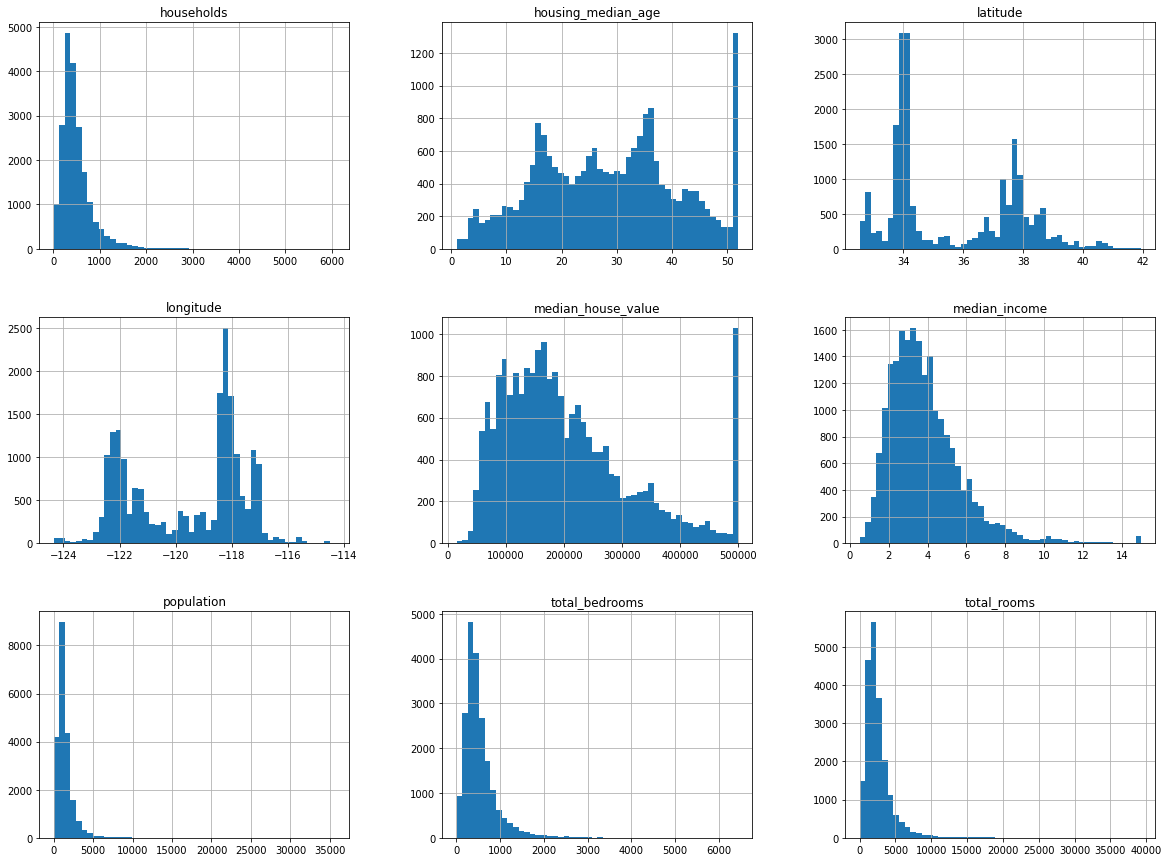

In [10]:
import matplotlib.pyplot as plt
housing_pd.hist(bins=50, figsize=(20,15))

There are a few things you might notice in these histograms:

1. First, the median income attribute does not look like it is expressed in US dollars (USD). After checking with the team that collected the data, you are told that the data has been scaled and capped at 15 (actually, 15.0001) for higher median incomes, and at 0.5 (actually, 0.4999) for lower median incomes. The numbers represent roughly tens of thousands of dollars (e.g., 3 actually means about $30,000). Working with preprocessed attributes is common in Machine Learning, and it is not necessarily a problem, but you should try to understand how the data was computed.

2. The housing median age and the median house value were also capped. The latter may be a serious problem since it is your target attribute (your labels). Your Machine Learning algorithms may learn that prices never go beyond that limit. You need to check with your client team (the team that will use your system’s output) to see if this is a problem or not. If they tell you that they need precise predictions even beyond $500,000, then you have two options:

  * Collect proper labels for the districts whose labels were capped
  * Remove those districts from the training set (and also from the test set, since your system should not be evaluated poorly if it predicts values beyond $500,000).

3. These attributes have very different scales. We will discuss this later in this chapter, when we explore feature scaling.

4. Finally, many histograms are tail-heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

Hopefully you now have a better understanding of the kind of data you are dealing with.

> ## WARNING
> 
> Wait! Before you look at the data any further, you need to create a test set, put it aside, and never look at it.

# Create a Test Set

It may sound strange to voluntarily set aside part of the data at this stage. After all, you have only taken a quick glance at the data, and surely you should learn a whole lot more about it before you decide what algorithms to use, right? This is true, but **your brain is an amazing pattern detection system**, which means that it **is highly prone to overfitting**: if you look at the test set, you may stumble upon some seemingly interesting pattern in the test data that leads you to select a particular kind of Machine Learning model. When you estimate the generalization error using the test set, your estimate will be too optimistic, and you will launch a system that will not perform as well as expected. This is called **data snooping bias**.

Creating a test set is theoretically simple: pick some instances randomly, typically 20% of the dataset (or less if your dataset is very large), and set them aside:

In [11]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(housing_pd,train_size=0.2)

print('ideal train size',housing_pd.shape[0]*0.2)
print('train_size :', train.shape)
print('test_size :', test.shape)

# get the column title of dataframe
col_list = list(housing_pd)

ideal train size 4128.0
train_size : (4128, 10)
test_size : (16512, 10)


In [12]:
col_list

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [0]:
from sklearn.model_selection import train_test_split

x = housing_pd.drop(['median_house_value'], axis=1)
list(x)
t =x.values
t.shape
y = housing_pd['median_house_value'].values
y.shape

X_train,X_test, y_train, y_test = train_test_split(t,y,random_state=0,train_size=0.2)

Well, this works, but it is not perfect: if you run the program again, it will generate a different test set! Over time, you (or your Machine Learning algorithms) will get to see the whole dataset, which is what you want to avoid.

One solution is to save the test set on the first run and then load it in subsequent runs. **Another option is to set the random number generator’s seed** (e.g., with `np.random.seed(42)`) before calling `np.random.permutation()` so that it always generates the same shuffled indices.

In [14]:
train, test = train_test_split(housing_pd,train_size=0.8, random_state=42)

print('train_size :', train.shape)
print('test_size :', test.shape)


train_size : (16512, 10)
test_size : (4128, 10)


후에 데이터 등이 추가되는 경우의 index등에 대한 처리 부분은 생략!!

So far we have considered purely random sampling methods. This is generally fine if your dataset is large enough (especially relative to the number of attributes), but if it is not, you run the risk of introducing a significant sampling bias. When a survey company decides to call 1,000 people to ask them a few questions, they don’t just pick 1,000 people randomly in a phone book. They try to ensure that these 1,000 people are representative of the whole population. For example, the US population is 51.3% females and 48.7% males, so a well-conducted survey in the US would try to maintain this ratio in the sample: 513 female and 487 male. 

This is called `stratified sampling`: 
the population is divided into homogeneous subgroups called **strata**, and the right number of instances are sampled from each **stratum** to guarantee that the test set is representative of the overall population. 

If the people running the survey used purely random sampling, there would be about a 12% chance of sampling a skewed test set that was either less than 49% female or more than 54% female. Either way, the survey results would be significantly biased.

Suppose you chatted with experts who told you that the median income is a very important attribute to predict median housing prices. You may want to ensure that **the test set is representative of the various categories of incomes in the whole dataset**. Since the median income is a continuous numerical attribute, you first need to create an income category attribute. 

Let’s look at the median income histogram more closely (back in Figure of histgrams): most median income values are clustered around 1.5 to 6 (i.e., $15,000–$60,000), but some median incomes go far beyond 6. **It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of a stratum’s importance may be biased**. 

This means that **you should not have too many strata**, and **each stratum should be large enough**. The following code uses the `pd.cut()` function to create an income category attribute with five categories (labeled from 1 to 5): category 1 ranges from 0 to 1.5 (i.e., less than $15,000), category 2 from 1.5 to 3, and so on:

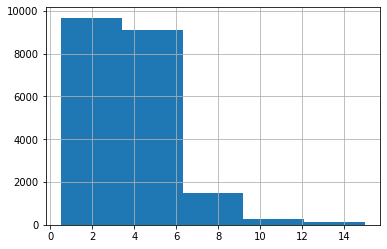

In [15]:
housing_pd['median_income'].hist(bins=5)

In [16]:
import numpy as np
print(housing_pd.shape)
housing_pd['income_cat'] = pd.cut(
    housing_pd['median_income'],
    bins=[0.,1.5,3.0,4.5,6.,np.inf],
    labels=[1,2,3,4,5]
)

print(housing_pd.shape)
list(housing_pd)

(20640, 10)
(20640, 11)


['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity',
 'income_cat']

In [17]:
housing_pd['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

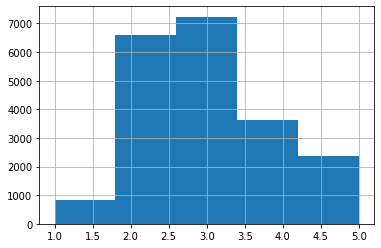

In [18]:
housing_pd['income_cat'].hist(bins=5)

Now you are ready to do **stratified sampling** *based on the income category*. For this you can use Scikit-Learn’s `StratifiedShuffleSplit` class:

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_pd, housing_pd["income_cat"]):
  strat_train_set = housing_pd.loc[train_index]
  strat_test_set = housing_pd.loc[test_index]

Let’s see if this worked as expected. You can start by looking at the income category proportions in the test set:

In [20]:
strat_test_set['income_cat'].value_counts() /len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [21]:
strat_train_set['income_cat'].value_counts() /len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [22]:
housing_pd['income_cat'].value_counts()/len(housing_pd)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

아래 함수를 통해 statified sampling이 random sampling보다 전체 데이터 셋의 특성을 잘 반영하는 test dataset을 구성하는 것을 확인할 수 있음.

In [23]:
def income_cat_proportions(data):
  return data['income_cat'].value_counts()/len(data)

X_train,X_test = train_test_split(housing_pd, test_size=0.2, random_state=42)

compare_props =pd.DataFrame({
    'Overall': income_cat_proportions(housing_pd),
    'Stratified': income_cat_proportions(strat_test_set),
    'Random': income_cat_proportions(X_test),
}).sort_index()

compare_props['Rand. %error'] = 100*compare_props['Random']/compare_props['Overall'] -100
compare_props['Strat. %error']= 100*compare_props['Stratified']/compare_props['Overall']-10

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,89.756691
2,0.318847,0.318798,0.324370,1.732260,89.984805
3,0.350581,0.350533,0.358527,2.266446,89.986180
4,0.176308,0.176357,0.167393,-5.056334,90.027480
5,0.114438,0.114583,0.109496,-4.318374,90.127011


In [0]:
for c_set in (strat_train_set,strat_test_set):
  c_set.drop('income_cat', axis=1, inplace=True)

# 2.4

2020.4.24 시작부분.

Test data와 Training data를 분리하고 나서는 Test data를 살펴보는 것은 피해야 함.

Training data가 클 경우, 이를 다시 여러 subset으로 나누어 처리하나 현재 데이터(약 16,000 샘플)는 그리 크지 않으므로 그대로 진행. batch learning!

In [0]:
housing = strat_train_set.copy()

## 2.4.1

모델의 선택 등을 위해 데이터에 대한 이해가 필요함.
* 다시 한번 강조하지만, 반드시 training data에서만 이루어져야 함.

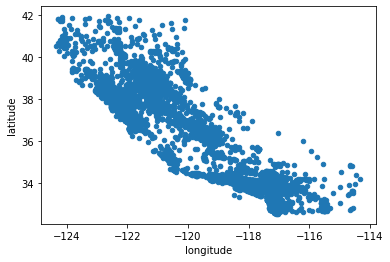

In [26]:
housing.plot(kind='scatter', x='longitude', y='latitude')

위의 경우, 인구의 밀집 지역 여부 등을 보기 어려움.
원을 투명화시켜서(`alpha`) 밀집된 경우 겹치게 하여 보다 인구 밀집 지역을 확인할 수 있게 scattergram을 표시

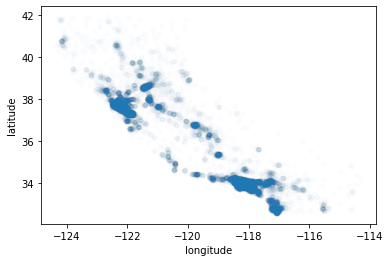

In [27]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.01) #alpha는 투명도. 투명도를 이용하여 샘플이 밀집된 부분을 표시.

인구 밀집도와 함께, 구역의 인구수(원의 크기 `s` 옵션)와 주택가격(색, `jet` 컬러맵: blue=low, red=high)을 같이 표시.

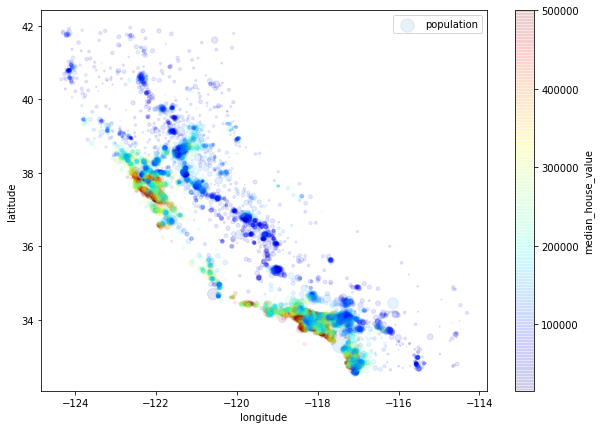

In [28]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1,
             s=housing['population']/100, label='population', figsize=(10,7),
             c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
             sharex=False
             )#c='median_house_value' 는 color 값을 의미.

주택 가격과 인구 밀집도가 매우 높은 관계가 있는 걸로 보임.

특정 지역 (해안가?)도 집값이 높음 (하지만 다 가깝다고 높지는 않은 듯..)

clustering(비지도학습)을 통한 분류를 사용시 데이터의 패턴을 이해하는데 도움이 되기도 함.

하지만, 수식적으로 correlation coef를 통해 각 feature들간의 관련성을 살펴볼 수 있음. (현재 특성 수가 그리 많지 않으므로 충분히 시도할 가치 있음, 단 너무 차원이 높을 경우 매우 복잡해짐.)

In [29]:
corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

* median_income : 상당한 correlation을 보임.
* latitude : 위도와 음의 correlation. 북으로 갈수록 집값이 싸다.

## Correlation (Pearson's correlation coef.)


![corrleation_coef](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1024px-Correlation_examples2.svg.png)

Several sets of (x, y) points, with the **Pearson correlation coefficient** of x and y for each set. The correlation reflects the noisiness and direction of a linear relationship (top row), but **not the slope of that relationship (middle)**, **nor many aspects of nonlinear relationships (bottom)**. N.B.: the figure in the center has a slope of 0 but in that case the correlation coefficient is undefined because the variance of `Y` is zero.

$$
\begin{align*}
\text{corr}(X,Y) &= \frac{\text{cov}(X,Y)}{\sigma_X \sigma_Y} \\
&= \frac{ E[ (X-\mu_X)(Y-\mu_Y) ] }{\sigma_X \sigma_Y} 
\end{align*}
$$
* The correlation coefficient is symmetric

correlation을 보여주는 방법은 바로 scatterdiabram임.

pandas의 `scatter_mattrix`가 가장 쉬운 방법.

> 현재 feature의 갯수가 11개(숫자만...)이므로 $11 \times 11 = 121$개의 그래프가 만들어짐. 때문에 attrigute를 한정하여 처리함.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fefebea71d0>,
      dtype=object)

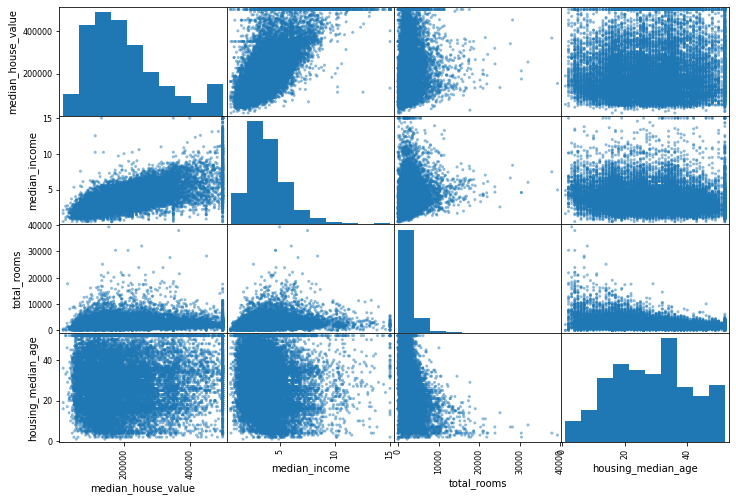

In [30]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", 
              "median_income", 
              "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
#save_fig("scatter_matrix_plot")

**The most promising attribute** to predict the `median house value` is the `median income`, so let’s zoom in on their correlation scatterplot.

(0.0, 16.0, 0.0, 550000.0)

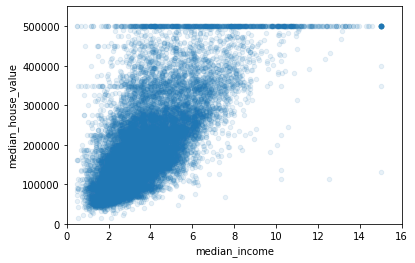

In [31]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

This plot reveals a few things. First, the correlation is indeed very strong; you can clearly see the upward trend, and the points are not too dispersed. Second, the price cap that we noticed earlier is clearly visible as a horizontal line at `$500,000`. But this plot reveals other less obvious straight lines: a horizontal line around `$450,000`, another around `$350,000`, perhaps one around `$280,000`, and a few more below that. 

**You may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks.**

# Experimenting with Attribute Combinations

Hopefully the previous sections gave you **an idea of a few ways you can explore the data** and **gain insights**. 

* You identified **a few data quirks** that you may want to clean up before feeding the data to a Machine Learning algorithm, and 
* you found interesting **correlations** between attributes, in particular with the target attribute. 
* You also noticed that some attributes have a tail-heavy distribution, so you may want to transform them (e.g., by computing their logarithm). 

Of course, your mileage will vary considerably with each project, but the general ideas are similar.


One last thing you may want to do before preparing the data for Machine Learning algorithms is to try out **various attribute combinations**.
> 여러 특성을 반영하는 하나의 지표 생성.

 For example, `the total number of rooms` in a district is not very useful if you don’t know how many households there are. What you really want is `the number of rooms per household`. 

Similarly, `the total number of bedrooms` by itself is not very useful: you probably want to compare it to the number of rooms. 

And the population per household also seems like an interesting attribute combination to look at. Let’s create these new attributes:

In [0]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [33]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

The new `bedrooms_per_room` attribute is much more correlated with the `median house value` than the `total number of rooms or bedrooms`. 

Apparently houses with a lower bedroom/room ratio tend to be more expensive. `The number of rooms per household` is also more informative than the `total number of rooms` in a district—**obviously the larger the houses, the more expensive they are**.

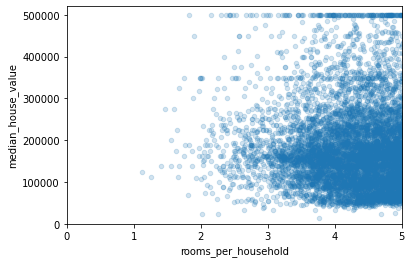

0.1462852517166395


In [34]:
housing.plot(kind="scatter", 
             x="rooms_per_household", 
             y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()
print(corr_matrix["median_house_value"]["rooms_per_household"])

This round of exploration does not have to be **absolutely thorough**; **the point** is 
* to start off on the `right foot` and 
* quickly `gain insights` that will help you get a first reasonably good prototype. 

But this is an **iterative process**: 
* once you get a prototype up and running, 
* you can analyze its output to gain more insights and 
* come back to this exploration step.

> 도돌이표...

In [35]:
print(housing.shape)
housing.describe()

(16512, 13)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# Prepare the Data for Machine Learning Algorithms

It’s time to prepare the data for your Machine Learning algorithms. Instead of doing this manually, **you should write functions** for this purpose, for several good reasons:

* This will allow you to **reproduce** these transformations easily on any dataset (e.g., the next time you get a fresh dataset). 
> 이전에 언급했듯이 빠른 프로토타이핑과 반복되는 프로세스 가 기계학습에서는 필수이므로 이에 대한 대비를 해야함.
* You will **gradually build a library of transformation functions** that you can reuse in future projects.
* You can use these functions in **your live system** to transform the new data before feeding it to your algorithms.
* This will make it possible for you to **easily try various transformations** and **see which combination of transformations works best**.
> 다양한 분석이 보다 용이해짐.

But first let’s revert to a clean training set (by copying `strat_train_set` once again). 

Let’s also **separate the predictors and the labels**, 
* since we don’t necessarily want to apply the same transformations to the predictors and the target values 

> note that 
> 
> `drop()` **creates a copy of the data and does not affect** `strat_train_set`:

In [0]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training
housing_labels = strat_train_set["median_house_value"].copy()

## Data Cleaning

Most Machine Learning algorithms cannot work with **missing features**, so let’s create a few functions to take care of them. We saw earlier that the `total_bedrooms` attribute has some missing values, so let’s fix this.

In [37]:
print(housing.shape)

(16512, 9)


In [38]:
housing.isnull().head()#null인 부분만 true로 바뀜

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,False,False,False,False,False,False,False,False,False
18632,False,False,False,False,False,False,False,False,False
14650,False,False,False,False,False,False,False,False,False
3230,False,False,False,False,False,False,False,False,False
3555,False,False,False,False,False,False,False,False,False


In [39]:
t = housing.isnull().any(axis=1)#한 행당 한개라도 null이 있다면 true
t[t==True]

4629     True
6068     True
17923    True
13656    True
19252    True
         ... 
3376     True
4691     True
6052     True
17198    True
4738     True
Length: 158, dtype: bool

In [40]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
print(sample_incomplete_rows)
print(sample_incomplete_rows)

       longitude  latitude  ...  median_income  ocean_proximity
4629     -118.30     34.07  ...         2.2708        <1H OCEAN
6068     -117.86     34.01  ...         5.1762        <1H OCEAN
17923    -121.97     37.35  ...         4.6328        <1H OCEAN
13656    -117.30     34.05  ...         1.6675           INLAND
19252    -122.79     38.48  ...         3.1662        <1H OCEAN

[5 rows x 9 columns]
       longitude  latitude  ...  median_income  ocean_proximity
4629     -118.30     34.07  ...         2.2708        <1H OCEAN
6068     -117.86     34.01  ...         5.1762        <1H OCEAN
17923    -121.97     37.35  ...         4.6328        <1H OCEAN
13656    -117.30     34.05  ...         1.6675           INLAND
19252    -122.79     38.48  ...         3.1662        <1H OCEAN

[5 rows x 9 columns]


 You have three options:

* Get rid of the corresponding districts.
* Get rid of the whole attribute.
* Set the values to some value (zero, the mean, the median, etc.).(많이 씀. mean이나 median 값을 많이 넣는다)

You can accomplish these easily using DataFrame’s `dropna()`, `drop()`, and `fillna()` methods:

In [41]:
# option 1 : NA = Not Applicable (공란, 또는 해당없음.)
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [42]:
# option 2 - 열을 지움 col 이 진짜 안중요하지 않는 이상 잘 쓸일은 없음
print(sample_incomplete_rows.drop("total_bedrooms", axis=1).shape)
print(sample_incomplete_rows.shape)

(5, 8)
(5, 9)


In [43]:
# option 3
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) 
sample_incomplete_rows


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


If you choose **option 3**, 

* **you should compute the median value on the training set** and 
* use it to fill the missing values in the training set. 


**Don’t forget to save the median value that you have computed.** 

> 이후 inference에서도 다시 사용해야함.

You will need it later to replace missing values in the **test set** when you want to evaluate your system, and also once the system goes live to replace missing values in new data.

Scikit-Learn provides **a handy class to take care of missing values**: `SimpleImputer`. 

Here is how to use it. 
* First, you need to create a `SimpleImputer` instance, specifying that you want to replace each attribute’s missing values with the **median** of that attribute:

In [0]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Since **the median can only be computed on numerical attributes**, you need to create a copy of the data without the text attribute `ocean_proximity`:

In [0]:
housing_num = housing.drop("ocean_proximity", axis=1)#숫자만 fit 가능하므로
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

Now you can fit the `imputer` instance to the training data using the `fit()` method:

In [46]:
imputer.fit(housing_num)


SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

The `imputer` has simply 
* computed the median of each attribute and 
* stored the result in its `statistics_` instance variable. 

Only the `total_bedrooms` attribute had missing values, but we cannot be sure that there won’t be any missing values in new data after the system goes live, so it is safer to apply the imputer to all the numerical attributes:

In [47]:
# Check that this is the same as manually computing the median of each attribute:

print(imputer.statistics_)
print(housing_num.median().values)

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


Now you can use this “trained” imputer to `transform`** the training set** by replacing missing values with the learned medians:

In [48]:
print(housing_num.shape)
X = imputer.transform(housing_num)
print(X.shape)

(16512, 8)
(16512, 8)


The result is **a plain NumPy array** containing the transformed features. 

If you want to put it back into a pandas DataFrame, it’s simple:

In [49]:
housing_tr = pd.DataFrame(X, 
                          columns=housing_num.columns,
                          index=housing.index)

housing_tr.loc[sample_incomplete_rows.index.values]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


In [50]:
imputer.strategy

'median'

## Handling Text and Categorical Attributes

> 결국 기계학습은 대부분 vector (혹은 tensor)만을 다루기 때문에 **숫자**가 아닌 데이터들에 대한 처리가 필수.

So far we have only dealt with **numerical attributes**, but now let’s look at **text attributes**. 

In this dataset, there is just one: the `ocean_proximity` attribute. 

(숫자로만 이루어져야 한다. 미분이 가능해야 한다. 문자를 숫자로 바꿀 때 많이 쓰이는게 one-hot encoding) 

Let’s look at its value for the first 10 instances:

In [51]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [52]:
housing_cat['ocean_proximity'].value_counts()#5개의 카테고리로 나누어 있음을 확인 할 수 있다.

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

It’s not arbitrary text: there are **a limited number of possible values**, each of which represents a **category**. 

So this attribute is a **categorical attribute**. 

Most Machine Learning algorithms prefer to work with numbers, so let’s convert these categories from text to numbers. For this, we can use Scikit-Learn’s `OrdinalEncoder` class:

> ordinal : 서수의 (첫째, 둘째 등등)


(`OrdinalEncoder` 순서에 맞춰서 인코딩을 함)

In [53]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
print(ordinal_encoder)
print(housing_cat_encoded[:10])
print(housing_cat[:10])

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)
[[0.]
 [0.]
 [4.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]]
      ocean_proximity
17606       <1H OCEAN
18632       <1H OCEAN
14650      NEAR OCEAN
3230           INLAND
3555        <1H OCEAN
19480          INLAND
8879        <1H OCEAN
13685          INLAND
4937        <1H OCEAN
4861        <1H OCEAN


You can get the list of categories using the `categories_` instance variable. 

It is a list containing a 1D array of categories for each categorical attribute (in this case, a list containing a single array since there is just one categorical attribute):

In [54]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this representation is that ML algorithms will assume that **two nearby values are more similar than two distant values**. 
* This may be fine in some cases (e.g., for ordered categories such as “bad,” “average,” “good,” and “excellent”), but 
* it is obviously not the case for the `ocean_proximity` column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1). 

> 그래서 one-hot encoding 이 제안됨.

To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is `<1H OCEAN` (and 0 otherwise), another attribute equal to 1 when the category is `INLAND` (and 0 otherwise), and so on. This is called **one-hot encoding**, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). 

The new attributes are sometimes called *dummy* attributes. Scikit-Learn provides a `OneHotEncoder` class **to convert categorical values into one-hot vectors**:


(순서가 전혀 의미가 없는 데이터의 경우에는 임의로 0,1,2,3 을 지정해 주는건 바르지 않음. one-hot 인코딩은 세개의 카테고리가 있다면 1 0 0, 0 1 0, 0 0 1 이런식으로 표현이 된다. classification 이나 레이블을 할 때 one-hot 인코딩은 많이 쓰인다. 카테고리가 너어어무 많으면 속도가 느려짐.)

In [55]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Notice that the output is a SciPy *sparse matrix*, instead of a NumPy array. This is very useful when you have categorical attributes **with thousands of categories**. 

After one-hot encoding, we get a matrix with thousands of columns, and the matrix is full of 0s except for a single 1 per row. Using up tons of memory mostly to store zeros would be very wasteful, so instead a sparse matrix only stores the location of the nonzero elements. 

You can use it mostly like a normal 2D array, but if you really want to convert it to a (dense) NumPy array, just call the `toarray()` method:

In [56]:
housing_cat_1hot.toarray()


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Alternatively, you can set sparse=False when creating the OneHotEncoder:  
(sparse matrix를 쓰지 말라는 뜻)

In [57]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [58]:
cat_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

여왕-여자=왕
이런식의 개념은 one-hot encoding에서 불가능
text data 에서는 이런 개념이 필요할 수도 있다.
단어들 사이에 연관이 있으면 숫자가 가까울 수도 있는 것처럼

워드 임베딩: 단어들을 학습해서 비슷한 의미를 가지는 단어들을 차 연산 했을 때 거리가 가깝고, 완전히 다른 의미를 가지는 단어들은 거리가 멀게끔 인코딩이 됨. 숫자들이 의미를 가짐
### Note : Embedding

If a categorical attribute has a large number of possible categories (e.g., country code, profession, species), then one-hot encoding will result in a large number of input features. This may slow down training and degrade performance. 

If this happens, you may want **to replace the categorical input with useful numerical features related to the categories**: 
* for example, you could replace the `ocean_proximity` feature with **the distance to the ocean** 
* (similarly, a country code could be replaced with the country’s population and GDP per capita). 

Alternatively, you could replace each category with **a learnable, low-dimensional vector** called an `embedding`. 
* Each category’s representation would be learned during training. 
* This is an example of representation learning (see Chapters 13 and 17 for more details).

# Custom Transformers

Although Scikit-Learn provides many useful transformers, you will need to write **your own** for tasks such as 
* custom cleanup operations or 
* combining specific attributes. 


You will want **your transformer** to work seamlessly with Scikit-Learn functionalities (such as pipelines), and since **Scikit-Learn relies on duck typing (not inheritance)**, 

**all you need to do is create a class and implement three methods:** 
* fit() (returning self), 
* transform(), and 
* fit_transform().

You can get the last one for free by simply adding `TransformerMixin` as a base class. 

If you add `BaseEstimator` as a base class (and avoid `*args` and `**kargs` in your constructor), you will also get two extra methods (`get_params()` and `set_params()`) that will be useful for automatic hyperparameter tuning.

For example, here is a small transformer class that adds the combined attributes we discussed earlier:




In [59]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X, y=None):
        rooms_per_household      = X[:, rooms_ix] / X[:, households_ix]#x에서 room에 있는 데이터로부터 household로 나눠준 다음에 저장
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
print(housing.values.shape)
print(housing_extra_attribs.shape)

(16512, 9)
(16512, 11)


In [60]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In this example the transformer has **one hyperparameter**, `add_bedrooms_per_room`, set to `True` by default (it is often helpful to provide sensible defaults). 
> 합리적 또는 자주 쓰이는 값을 기본으로 설정할 것. 

This hyperparameter will allow you to easily find out whether adding this attribute helps the Machine Learning algorithms or not. 

More generally, you can add a hyperparameter to gate any data preparation step that you are not 100% sure about. 

> 새로운 attribute가 실제 도움이 될지 확인해봐야만 함!

**The more you automate these data preparation steps, the more combinations you can automatically try out, making it much more likely that you will find a great combination (and saving you a lot of time)**

# Feature Scaling

**One of the most important transformations** you need to apply to your data is ***feature scaling***. 

With few exceptions, 
* Machine Learning algorithms don’t perform well when **the input numerical attributes have very different scales**. 

This is the case for the housing data: 
* the total number of rooms ranges from about 6 to 39,320, while 
* the median incomes only range from 0 to 15. 

**Note that scaling the target values is generally not required.**

There are **two common ways** to get all attributes to have the same scale: 
* min-max scaling and 
* standardization.

## Min-max scaling (many people call this normalization) is the simplest: 
* values are shifted and rescaled so that they end up **ranging from 0 to 1**. 
* We do this by subtracting the min value and dividing by the max minus the min. 
* Scikit-Learn provides a transformer called `MinMaxScaler` for this. 
* It has a `feature_range` hyperparameter that lets you change the range if, for some reason, you don’t want 0–1.  
(min-max scaling은 outliers에 매우 취약하다.)

## Standardization 
* first it subtracts the `mean` value (so standardized values always have a **zero mean**), and then 
* it divides by the `standard deviation` so that the resulting distribution has **unit variance**. 

Unlike min-max scaling, **standardization does not bound values to a specific range**, which may be a problem for some algorithms (e.g., neural networks often expect an input value *ranging from 0 to 1*). 

**However, standardization is much less affected by outliers.** 
* For example, suppose a district had a median income equal to 100 (by mistake). 
* `Min-max scaling` would then crush all the other values from 0–15 down to 0–0.15, whereas
* `standardization` would not be much affected. 

Scikit-Learn provides a transformer called `StandardScaler` for standardization.

> Scaling도 결국 training dataset 를 기준으로 계산되는 것임!


# Transformation Pipelines

As you can see, there are many data transformation steps that need to be executed **in the right order**. 

Fortunately, Scikit-Learn provides the `Pipeline` class to help with such sequences of transformations. Here is a small pipeline for the numerical attributes:

In [0]:
from sklearn.pipeline import Pipeline#pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

The `Pipeline` constructor takes **a list of name/estimator pairs** defining a sequence of steps. 
* All but the last estimator must be **transformers** (i.e., they must have a `fit_transform()` method). 
* The names can be anything you like (as long as they are unique and **don’t contain double underscores,** `__`); they will come in handy later for hyperparameter tuning.

When you call the pipeline’s `fit()` method, 
* it calls `fit_transform()` sequentially on all transformers, 
* passing the output of each call as the parameter to the next call until it reaches **the final estimator**, 
* for which it calls the `fit()` method.

The pipeline exposes the same methods as the **final estimator**. 

In this example, the last estimator is a `StandardScaler`, which is a **transformer**, so the pipeline has a `transform()` method that *applies all the transforms to the data in sequence* (and of course also a `fit_transform()` method, which is the one we used).

In [62]:
housing_num_tr


array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

So far, we have handled **the categorical columns** and **the numerical columns** ***separately***. 

It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column. 

In version 0.20, Scikit-Learn introduced the `ColumnTransformer` for this purpose, and the good news is that it works great with **pandas** `DataFrames`. 

Let’s use it to apply all the transformations to the housing data:

In [0]:
from sklearn.compose import ColumnTransformer#카테고리컬 데이터까지 사용하려고

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),],
        remainder='drop')

housing_prepared = full_pipeline.fit_transform(housing)



In [84]:
type(housing_prepared)

numpy.ndarray

* First we import the `ColumnTransformer` class, 
* next we get the list of numerical column names and the list of categorical column names, and then 
* we construct a `ColumnTransformer`. 

The constructor requires **a list of tuples**, where 
* each tuple contains 
   * a **name**, 
   * a **transformer**, and 
   * a **list of names (or indices) of columns** that the transformer should be applied to. 

In this example, 
* we specify that the **numerical** columns should be transformed using the `num_pipeline` that we defined earlier, 
* and the **categorical** columns should be transformed using a `OneHotEncoder`. 
* Finally, we apply this `ColumnTransformer` to the **housing data**: it applies each transformer to the appropriate columns and concatenates the outputs along the second axis (the transformers must return the same number of rows).

Note that the `OneHotEncoder` returns a **sparse matrix**, while the `num_pipeline` returns a **dense matrix**. 

When there is such a mix of sparse and dense matrices, the `ColumnTransformer` **estimates the density of the final matrix** (i.e., the ratio of nonzero cells), and it returns a sparse matrix if the density is lower than a given threshold (by default, sparse_threshold=0.3). 

In this example, it returns a dense matrix. And that’s it! We have a preprocessing pipeline that takes the full housing data and applies the appropriate transformations to each column.

In [65]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [66]:
housing_prepared.shape

(16512, 16)

### TIP

Instead of using a transformer, you can specify the string **`drop`** if you want the columns to be dropped, or you can specify **`passthrough`** if you want the columns to be left untouched. 

By default, the remaining columns (i.e., the ones that were not listed) will be dropped, but you can set the `remainder` hyperparameter to any transformer (or to `passthrough`) if you want these columns to be handled differently.

# Select and Train a Model

At last! 
* You framed the problem, 
* you got the data and explored it, 
* you sampled a training set and a test set, and
* you wrote transformation pipelines to clean up and prepare your data for Machine Learning algorithms automatically. 

You are now ready to select and train a Machine Learning model.

## **Training** and **Evaluating** on the Training Set

The good news is that thanks to all these previous steps, things are now going to be much simpler than you might think. 

Let’s first train a `Linear Regression model`, like we did in the previous chapter:

In [67]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

You now have a working Linear Regression model. Let’s try it out on a few instances from the training set:

In [68]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]#housing은 training data set
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", np.round(lr.predict(some_data_prepared),2))
print("Labels:", list(some_labels))

Predictions: [210644.6  317768.81 210956.43  59218.99 189747.56]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [69]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(some_labels,lr.predict(some_data_prepared)))/np.mean(some_labels)
#mean_squared_error(some_labels,some_labels)

#이상적인 값을 기준으로 에러가 20%정도 나오는 상태 ==> 얘는 5개의 데이터만 가지고 함.

0.20703457337482153

It works, although the predictions are not exactly accurate (e.g., the first prediction is off by close to 40%!). Let’s measure this regression model’s RMSE on the whole training set using Scikit-Learn’s `mean_squared_error()` function:

In [70]:
from sklearn.metrics import mean_squared_error

housing_predictions = lr.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)#루트 씌워서 root mean squared error 구하기
print('rmse of lr : ',lin_rmse)
print('rmse(%) of lr : ',lin_rmse/np.mean(housing_labels))
#모든 데이터를 기준으로 하면 약 33%의 에러.

rmse of lr :  68628.19819848923
rmse(%) of lr :  0.33155173163315144


In [71]:
from sklearn.metrics import mean_absolute_error#rmse와 달리 제곱을 안해줘서 값이 좀 낮아지게 됨.

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
print('mae of lr : ',lin_mae)
print('mae(%) of lr : ',lin_mae/np.mean(housing_labels))

mae of lr :  49439.89599001897
mae(%) of lr :  0.23885055352676499


This is better than nothing, but clearly not a great score: most districts’ median_housing_values range between `$120,000` and `$265,000`, so a typical prediction error of `$68,628` is not very satisfying.  
($68,628이면 제일 싼 집의 반값이 넘는 가격이라 되게 오차가 많이 난다고 생각할 수 있다.)   

This is an example of **a model underfitting** the training data. When this happens it can mean that
* **the features do not provide enough information** to make good predictions, or that 
* the **model is not powerful enough**. 


As we saw in the previous chapter, the main ways to fix underfitting are
* **to select a more powerful model**, 
* to feed the training algorithm with **better features**, or 
* to **reduce the constraints on the model**.

This model is not regularized, which rules out the last option. You could try to add more features (e.g., the log of the population), but first let’s try a **more complex model** to see how it does.

Let’s train a `DecisionTreeRegressor`. This is a powerful model, **capable of finding complex nonlinear relationships** in the data (Decision Trees are presented in more detail in Chapter 6). The code should look familiar by now:

In [72]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [73]:
housing_predictions = tree_reg.predict(housing_prepared)#공부한 애를 다시 넣어서 predict
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
#값이 0이 되었기 때문에 overfit 된 것. 그러나 모델이 훈련이 되고 있다는 사실을 알 수는 있음.

0.0

No error at all? 

Could this model really be absolutely perfect? 

Of course, it is much more likely that *the model has badly **overfit** the data*. 

How can you be sure? 

As we saw earlier, you don’t want to touch the test set until you are ready to launch a model you are confident about, so you need to use part of the training set for training and part of it for **model validation**.

## Better Evaluation Using Cross-Validation

One way to evaluate the Decision Tree model would be to use the train_test_split() function to split the training set into a smaller training set and a validation set, then train your models against the smaller training set and evaluate them against the validation set. It’s a bit of work, but nothing too difficult, and it would work fairly well.

A great alternative is to use Scikit-Learn’s ***K-fold cross-validation** feature. The following code 
* randomly splits the training set into 10 distinct subsets called folds, 
* then it trains and evaluates the Decision Tree model 10 times, 
* picking a different fold for evaluation every time and training on the other 9 folds. 

The result is an array containing the 10 evaluation scores:

### WARNING

Scikit-Learn’s cross-validation features expect **a utility function (greater is better)** rather than a cost function (lower is better), so **the scoring function** is actually **the opposite of the MSE (i.e., a negative value)**, which is why the preceding code computes `-scores` before calculating the square root.

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, 
                         housing_prepared, 
                         housing_labels,
                         scoring="neg_mean_squared_error", 
                         cv=10)
tree_rmse_scores = np.sqrt(-scores)


In [75]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())#작으면 작을수록 항상 재현성이 높다는 뜻이다. 기복이 높으면 좋지 않다. 어쩔땐 맞추고 어쩔땐 못 맞추는 거니까.

display_scores(tree_rmse_scores)
#결과를 보면 심각하게 오버피트가 되어 있어서 안본 데이터에 대해서는 linear보다 더 못한 성능이 나온다.

Scores: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean: 71407.68766037929
Standard deviation: 2439.4345041191004


Now the Decision Tree doesn’t look as good as it did earlier. 

In fact, it seems to perform worse than the `Linear Regression model`! 

Notice that cross-validation allows you to get not only 
* an estimate of the performance of your model, but also 
* a measure of how precise this estimate is (i.e., its standard deviation). 

The Decision Tree has a score of approximately `71,407`, generally `±2,439`. 

You would not have this information if you just used one validation set. But cross-validation comes at the cost of training the model several times, so it is not always possible.

In [76]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_st = cross_val_score(tree_reg, 
                            housing_prepared, 
                            housing_labels,
                            scoring="neg_mean_squared_error", 
                            cv=skf)
tree_rmse_scores_st = np.sqrt(-scores_st)
display_scores(tree_rmse_scores_st)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Scores: [71025.74235387 70206.93132081 71172.19267113 73555.41760908
 69518.11656939 69088.13987326 74581.68605642 69987.34002705
 71258.97354298 68473.48661544]
Mean: 70886.80266394187
Standard deviation: 1822.5469473967255


### 주의

일반적으로 회귀에는 기본 k-겹 교차검증을 사용하고, 분류에는 StratifiedKFold를 사용.

또한, cross_val_score 함수에는 KFold의 매개변수를 제어할 수가 없으므로, 따로 KFold 객체를 만들고 매개변수를 조정한 다음에 cross_val_score의 cv 매개변수에 넣어야 한다

Let’s compute the same scores for the Linear Regression model just to be sure:



In [77]:
lin_scores = cross_val_score(lr, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798344


> The Decision Tree has a score of approximately 71,407, generally ±2,439.

That’s right: the `Decision Tree model` is **overfitting so badly** that it performs worse 
than the Linear Regression model.

Let’s try one last model now: the `RandomForestRegressor`. 

As we will see in Chapter 7, Random Forests work by 
* training many Decision Trees
* **on random subsets of the features**, 
* then averaging out their predictions. 

Building a model on top of many other models is called `Ensemble Learning`, and **it is often a great way to push ML algorithms even further**. 

We will skip most of the code since it is essentially the same as for the other models:

In [78]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18603.515021376355

In [79]:
#위에 나온 값이 정말인지 k-폴드를 통해 확인
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
Mean: 50182.303100336096
Standard deviation: 2097.0810550985693


(지나치게 오버피팅이 되지는 않지만, 하이퍼 파라미터 들이 하나둘씩 늘어나게 되고, val 성적이 train 보다 낮다. 그럼 아직도 개선을 해야 할 필요가 있다는걸 명시함.)  
This is much better: `Random Forests` look very promising. 

> The Decision Tree has a score of approximately 71,407, generally ±2,439.
> 
> The Linear Regression has a scores of about 69,052, generally ±2,732


However, note that *the score on the training set is still **much lower** than on the validation sets*, meaning that the model is still **overfitting** the training set. 

Possible solutions for *overfitting* are to 
* simplify the model, 
* constrain it (i.e., regularize it), or 
* get a lot more training data. 

Before you dive much deeper into `Random Forests`, however, **you should try out many other models** from various categories of Machine Learning algorithms (e.g., several `Support Vector Machines` with different kernels, and possibly a `neural network`), without spending too much time tweaking the hyperparameters. 

The goal is to **shortlist a few (two to five) promising models**.

In [80]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111094.6308539982

### TIP 

실험한 모델을 모두 저장해두면 필요할 때 쉽게 모델을 복원할 수 있습니다. 교차 검증 점수와 실제 예측값은 물론 하이퍼파라미터와 훈련된 모델 파라미터 모두 저장해야 합니다. 이렇게 하면 여러 모델의 점수와 모델이 만든 오차를 쉽게 비교할 수 있습니다. 파이썬의 `pickle` 패키지나 (넘파이 배열을 저장하는 데 아주 효율적인) `joblib`을 사용하여 사이킷런 모델을 간단하게 저장할 수 있습니다.

```python
import joblib

joblib.dump(my_model, "my_model.pkl")
# and later...
my_model_loaded = joblib.load("my_model.pkl")
```

# Fine-Tune Your Model

Let’s assume that you now have a shortlist of promising models. You now need to fine-tune them. Let’s look at a few ways you can do that.

## **Grid Search**

One option would be to fiddle with the hyperparameters manually (손으로 조작하기...--;;), until you find a great combination of hyperparameter values. 

This would be very tedious work, and you may not have time to explore many combinations.

Instead, you should get Scikit-Learn’s `GridSearchCV` to search for you. 

**All you need to do** is tell it 
* **which hyperparameters** you want it to experiment with and 
* **what values** to try out, and 

it will use cross-validation to evaluate all the possible combinations of hyperparameter values. 

For example, the following code searches for the best combination of hyperparameter values for the `RandomForestRegressor`:

This `param_grid` tells Scikit-Learn to first 
* evaluate all 3 × 4 = 12 combinations of `n_estimators` and `max_features` hyperparameter values specified in the first `dict` (don’t worry about what these hyperparameters mean for now; they will be explained in Chapter 7), 
* then try all 2 × 3 = 6 combinations of hyperparameter values in the second `dict`, 
* but this time with the `bootstrap` hyperparameter set to False instead of True (which is the default value for this hyperparameter).

In [81]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},#3*4 해서 12번 테스트 함
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,#5번의 cv. 한번의 조합에서 값이 5개 나온다. 4/5로 학습한게 5개 나오는거. 모든 데이터를 이 파라미터로 다시 학습 시킨 다음에 테스트 데이터 셋으로 학습시켜야 한다.
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

### TIP

When you have no idea what value a hyperparameter should have, a simple approach is to try out consecutive powers of 10 (or a smaller number if you want a more fine-grained search, as shown in this example with the `n_estimators` hyperparameter).

The grid search will explore 12 + 6 = 18 combinations of `RandomForestRegressor` hyperparameter values, and it will train each model 5 times (since we are using five-fold cross validation). In other words, all in all, there will be 18 × 5 = 90 rounds of training! 

It may take quite a long time, but when it is done you can get the best combination of parameters like this:

In [82]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

### TIP

Since 8 and 30 are the **maximum values** that were evaluated, you should probably try searching again with higher values; the score may continue to improve. 

You can also get the best estimator directly:



In [83]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

### NOTE

If `GridSearchCV` is initialized with `refit=True` (which is the default), then once it finds the best estimator using cross-validation, it retrains it on the whole training set. This is usually a good idea, since feeding it more data will likely improve its performance.

Let's look at the score of each hyperparameter combination tested during the grid search:





In [85]:
cvres = grid_search.cv_results_
print(list(cvres))
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_features', 'param_n_estimators', 'param_bootstrap', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score']
63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_f

In [86]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.074701,0.003107,0.004202,0.000119,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.837622e+09,-4.147108e+09,-4.196408e+09,-3.903319e+09,-4.184325e+09,-4.053756e+09,1.519591e+08,18,-1.064113e+09,-1.105142e+09,-1.116550e+09,-1.112342e+09,-1.129650e+09,-1.105559e+09,2.220402e+07
1,0.241654,0.006292,0.011318,0.000116,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.047771e+09,-3.254861e+09,-3.130196e+09,-2.865188e+09,-3.173856e+09,-3.094374e+09,1.327062e+08,11,-5.927175e+08,-5.870952e+08,-5.776964e+08,-5.716332e+08,-5.802501e+08,-5.818785e+08,7.345821e+06
2,0.715203,0.003060,0.032718,0.001331,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.689185e+09,-3.021086e+09,-2.948330e+09,-2.619995e+09,-2.970968e+09,-2.849913e+09,1.626875e+08,9,-4.381089e+08,-4.391272e+08,-4.371702e+08,-4.376955e+08,-4.452654e+08,-4.394734e+08,2.966320e+06
3,0.121626,0.001867,0.004195,0.000059,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.730181e+09,-3.786886e+09,-3.734515e+09,-3.418747e+09,-3.913907e+09,-3.716847e+09,1.631510e+08,16,-9.865163e+08,-1.012565e+09,-9.169425e+08,-1.037400e+09,-9.707739e+08,-9.848396e+08,4.084607e+07
4,0.394748,0.002717,0.011465,0.000253,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.666283e+09,-2.784511e+09,-2.892276e+09,-2.616813e+09,-2.948207e+09,-2.781618e+09,1.268607e+08,8,-5.097115e+08,-5.162820e+08,-4.962893e+08,-5.436192e+08,-5.160297e+08,-5.163863e+08,1.542862e+07
5,1.174122,0.002860,0.032269,0.000172,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.387153e+09,-2.588448e+09,-2.666426e+09,-2.398071e+09,-2.649316e+09,-2.537883e+09,1.214614e+08,3,-3.838835e+08,-3.880268e+08,-3.790867e+08,-4.040957e+08,-3.845520e+08,-3.879289e+08,8.571233e+06
6,0.164855,0.002431,0.004535,0.000528,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.119657e+09,-3.586319e+09,-3.592772e+09,-3.328934e+09,-3.579607e+09,-3.441458e+09,1.893056e+08,14,-9.245343e+08,-8.886939e+08,-9.353135e+08,-9.009801e+08,-8.624664e+08,-9.023976e+08,2.591445e+07
7,0.543870,0.004267,0.011577,0.000296,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.549663e+09,-2.782039e+09,-2.762720e+09,-2.521134e+09,-2.907667e+09,-2.704645e+09,1.471569e+08,6,-4.980344e+08,-5.045869e+08,-4.994664e+08,-4.990325e+08,-5.055542e+08,-5.013349e+08,3.100456e+06
8,1.642121,0.007336,0.032332,0.000170,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.370010e+09,-2.583638e+09,-2.607703e+09,-2.350953e+09,-2.661059e+09,-2.514673e+09,1.285080e+08,2,-3.838538e+08,-3.804711e+08,-3.805218e+08,-3.856095e+08,-3.901917e+08,-3.841296e+08,3.617057e+06
9,0.207414,0.001830,0.004282,0.000076,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.353504e+09,-3.348552e+09,-3.402843e+09,-3.129307e+09,-3.510047e+09,-3.348850e+09,1.241939e+08,13,-9.228123e+08,-8.553031e+08,-8.603321e+08,-8.881964e+08,-9.151287e+08,-8.883545e+08,2.750227e+07


In this example, we obtain the best solution by setting the `max_features` hyperparameter to 8 and the `n_estimators` hyperparameter to 30. 

The RMSE score for this combination is 49,682, which is slightly better than the score you got earlier using the default hyperparameter values (which was 50,182). 

Congratulations, you have successfully fine-tuned your best model!

### TIP

Don’t forget that **you can treat some of the data preparation steps as hyperparameters**. 

For example, the `grid search` will automatically find out whether or not to add a feature you were not sure about (e.g., using the `add_bedrooms_per_room` hyperparameter of your `CombinedAttributesAdder` transformer). 

It may similarly be used to automatically find the best way to handle outliers, missing features, feature selection, and more.

## Randomized Search

The grid search approach is fine when you are exploring relatively few combinations, like in the previous example, but when the hyperparameter search space is large, it is often preferable to use `RandomizedSearchCV` instead. This class can be used in much the same way as the `GridSearchCV` class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. This approach has two main benefits:

* If you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach).
* Simply by setting the number of iterations, you have more control over the computing budget you want to allocate to hyperparameter search.

In [87]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [88]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

rnd_search.best_params_

49150.70756927707 {'max_features': 7, 'n_estimators': 180}
51389.889203389284 {'max_features': 5, 'n_estimators': 15}
50796.155224308866 {'max_features': 3, 'n_estimators': 72}
50835.13360315349 {'max_features': 5, 'n_estimators': 21}
49280.9449827171 {'max_features': 7, 'n_estimators': 122}
50774.90662363929 {'max_features': 3, 'n_estimators': 75}
50682.78888164288 {'max_features': 3, 'n_estimators': 88}
49608.99608105296 {'max_features': 5, 'n_estimators': 100}
50473.61930350219 {'max_features': 3, 'n_estimators': 150}
64429.84143294435 {'max_features': 5, 'n_estimators': 2}


{'max_features': 7, 'n_estimators': 180}

## **Ensemble Methods**

Another way to fine-tune your system is to try to **combine the models that perform best**. 

The group (or “ensemble”) will often perform better than the best individual model (just like `Random Forests` perform better than the individual `Decision Trees` they rely on), **especially if the individual models make very different types of errors.** We will cover this topic in more detail in Chapter 7.

## Analyze the Best Models and Their Errors

You will often gain **good insights on the problem** by **inspecting the best models**. 

For example, the `RandomForestRegressor` can indicate **the relative importance of each attribute** for making accurate predictions:

In [89]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

Let’s display these importance scores next to their corresponding attribute names:

In [90]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

With this information, you may want to try dropping some of the less useful features (e.g., apparently only one `ocean_proximity` category is really useful, so you could try dropping the others).

**You should also look at the specific errors that your system makes**, then try to understand why it makes them and what could fix the problem (adding extra features or getting rid of uninformative ones, cleaning up outliers, etc.).

## Evaluate Your System on the Test Set

After tweaking your models for a while, you eventually have a system that performs sufficiently well. 

Now is the time to evaluate the final model on the **test set**. 

There is nothing special about this process; just get the predictors and the labels from your test set, run your `full_pipeline` to transform the data (call `transform()`, not `fit_transform()`—you do not want to fit the test set!), and evaluate the final model on the test set:

In [0]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [92]:
final_rmse#최종 결과

47730.22690385927

In some cases, such a point estimate of the **generalization error** will not be quite enough to convince you to launch: what if it is just 0.1% better than the model currently in production? 

You might want to have an idea of how precise this estimate is. 

For this, you can compute a 95% confidence interval for **the generalization error** using scipy.stats.t.interval():



In [93]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, 
                         len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors) # compute standard error of the mean
                         )
) 

array([45685.10470776, 49691.25001878])

We could compute the interval manually like this:

In [94]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(45685.10470776, 49691.25001877858)

Alternatively, we could use a z-scores rather than t-scores:

In [95]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(45685.717918136455, 49690.68623889413)

If you did a lot of hyperparameter tuning, **the performance will usually be slightly worse than what you measured using cross-validation** (because your system ends up **fine-tuned to perform well on the validation data** and will likely not perform as well on unknown datasets). 

It is not the case in this example, but when this happens you must resist the temptation to tweak the hyperparameters to make the numbers look good on the test set; the improvements would be unlikely to generalize to new data.

Now comes the project prelaunch phase: 
you need to 
* present your solution (
  * highlighting what you have learned, 
  * what worked and what did not, 
  * what assumptions were made, and 
  * what your system’s limitations are), 
* document everything, and 
* create nice presentations with clear visualizations and easy-to-remember statements (e.g., “the `median income` is the number one predictor of `housing prices`”). 

In this California housing example, the final performance of the system is not better than the experts’ price estimates, which were often off by about 20%, but it may still be a good idea to launch it, especially if this frees up some time for the experts so they can work on more interesting and productive tasks.